In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-paper')

# LCD-RRM contacts

## Contacts histogram

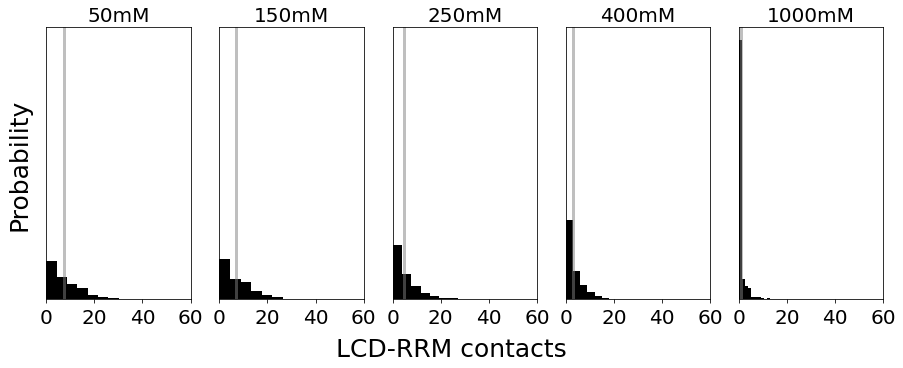

In [22]:
#LCD-RRM contacts

numcontdata = []
weights = []

conclist=[50,150,250,400,1000]

for i in range(len(conclist)):
    numcontdata.append(np.genfromtxt('LCDRRM_contacts_minusstart_'+ str(conclist[i]) +'mM.xvg', skip_header=24, usecols=(1), unpack=True))
    weights.append(np.genfromtxt('weights_' + str(conclist[i]) + 'mM.dat', usecols=(1), unpack=True))

fig, ax = plt.subplots(figsize = (15,5),ncols=5, sharex='col', sharey='row')
for i in range(len(numcontdata)):
    #ax[i].hist(numcontdata[i], bins=20, density=True, histtype='bar', linewidth=3, label="Before reweighting")
    ax[i].hist(numcontdata[i], bins=10, density=True, histtype='bar', linewidth=3, weights=weights[i], label="After reweighting", color="black")
    ax[i].set_xticks(np.arange(0, 70, step=20))
    ax[i].set_yticks([])
    ax[i].set_xlim(left=0, right=60)
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].set_title(str(conclist[i]) + 'mM', fontsize=20)
    #ax[i].axvline(x=np.average(numcontdata[i]), linewidth=3, alpha=0.5, label="Before reweighting")
    ax[i].axvline(x=np.average(numcontdata[i], weights=weights[i]), linewidth=3, alpha=0.5, label="After reweighting", color="gray")

#plt.legend(fontsize=20)
fig.text(0.5, 0.02, 'LCD-RRM contacts', ha='center', va='top', fontsize=25)
fig.text(0.1, 0.5, 'Probability', rotation=90, ha='center', va='center', fontsize=25)

fig.savefig("../figures/LCDRRM_contacts_histogram.pdf", bbox_inches='tight', pad_inches=1)


## LCD-RRM contacts per resi (RRMs)

In [23]:

DC = plt.rcParams['axes.prop_cycle'].by_key()['color']

resi = range(133,304)
NaCl = [50, 150, 250, 400, 1000]

avg_contacts_per_resi_NaCl = []
avg_contacts_per_resi_rew_NaCl = []

for conc in NaCl: 
    avg_contacts_per_resi = []
    avg_contacts_per_resi_rew = []
    
    weights = np.genfromtxt('weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt('resicontacts_LCDRRM/' + str(conc) + 'mM/LCD_RRM_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)    
        
        avg_contacts_per_resi.append(np.average(contacts))
        avg_contacts_per_resi_rew.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl.append(avg_contacts_per_resi)
    avg_contacts_per_resi_rew_NaCl.append(avg_contacts_per_resi_rew)

In [24]:
#Write to files
for i in range(len(NaCl)):
    with open('LCD_resicontacts_RRMs_' + str(NaCl[i]) + 'mM_group.dat', 'w') as output:
        output.write('#Resi \t LCD_contacts \t LCD_contacts_rew \n')
        for j in range(len(resi)):
            output.write('%i \t %f \t %f \n' % (resi[j], avg_contacts_per_resi_NaCl[i][j], avg_contacts_per_resi_rew_NaCl[i][j]))
            

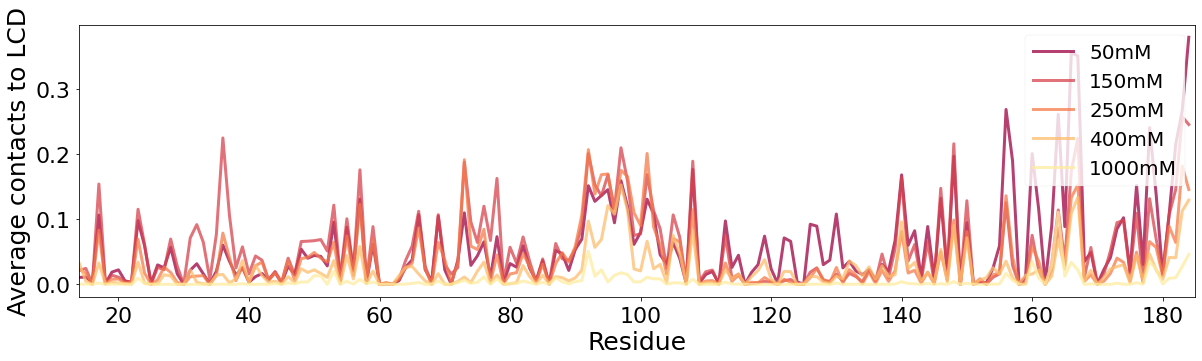

In [25]:
#Plot
fig, ax = plt.subplots(figsize=(20,5))

ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,0.55,6)))

resnum = range(133-119, 304-119)

for i in range(len(NaCl)):
    ax.plot(resnum, avg_contacts_per_resi_rew_NaCl[i], alpha=0.75, label=str(NaCl[i]) + 'mM', linewidth=3)

plt.legend(fontsize=20, loc='upper right')
plt.xticks(np.arange(20, 181, step=20))
#plt.yticks(np.arange(0, 1.1, step=0.5))
plt.xlim(133-119, 304-119)
#plt.ylim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Residue', fontsize=25)
plt.ylabel('Average contacts to LCD', fontsize=25)

fig.savefig('../figures/LCD_RRM_contactsperresi_group.pdf', bbox_inches='tight', pad_inches=1)


## LCD-RRMs contacts per resi (LCD)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

resi = range(314,434)
NaCl = [50, 150, 250, 400, 1000]

avg_contacts_per_resi_NaCl = []
avg_contacts_per_resi_rew_NaCl = []

for conc in NaCl: 
    avg_contacts_per_resi = []
    avg_contacts_per_resi_rew = []
    
    weights = np.genfromtxt('weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt('resicontacts_LCDres/' + str(conc) + 'mM/LCD_RRM_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)    
        
        avg_contacts_per_resi.append(np.average(contacts))
        avg_contacts_per_resi_rew.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl.append(avg_contacts_per_resi)
    avg_contacts_per_resi_rew_NaCl.append(avg_contacts_per_resi_rew)

In [27]:
#Write to files
for i in range(len(NaCl)):
    with open('RRMs_resicontacts_LCD_' + str(NaCl[i]) + 'mM_group.dat', 'w') as output:
        output.write('#Resi \t RRMs_contacts \t RRMs_contacts_rew \n')
        for j in range(len(resi)):
            output.write('%i \t %f \t %f \n' % (resi[j], avg_contacts_per_resi_NaCl[i][j], avg_contacts_per_resi_rew_NaCl[i][j]))
            

[195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]


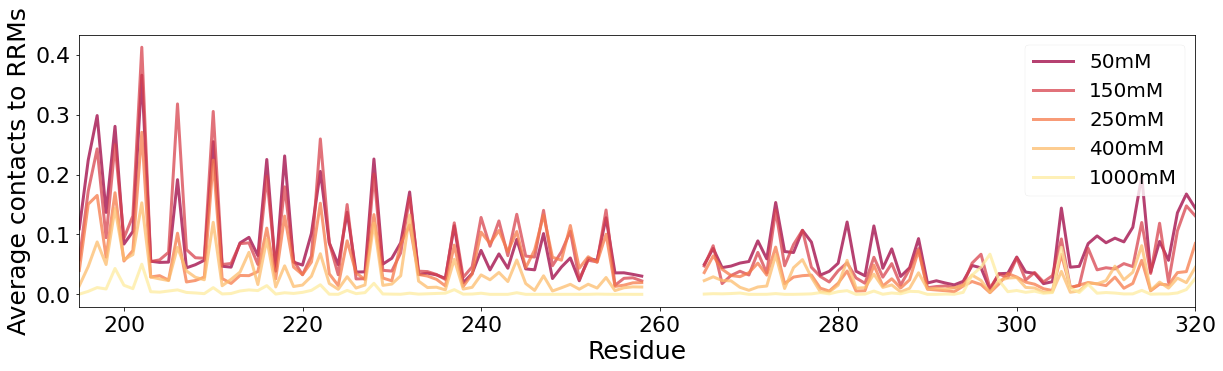

In [28]:
#Plot
fig, ax = plt.subplots(figsize=(20,5))

ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,0.55,6)))

Resinums = []
for i in range(314-119, 259):
    Resinums.append(i)
for i in range(265,434-119+6):
    Resinums.append(i)
print(Resinums)

for i in range(len(NaCl)):
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(Resinums[:Resinums.index(258)+1], avg_contacts_per_resi_rew_NaCl[i][:Resinums.index(258)+1], color=color, alpha=0.75, label=str(NaCl[i]) + 'mM', linewidth=3)
    ax.plot(Resinums[Resinums.index(265):], avg_contacts_per_resi_rew_NaCl[i][Resinums.index(265):], color=color, alpha=0.75, linewidth=3)
    
plt.legend(fontsize=20, loc='upper right')
#plt.xticks(np.arange(20, 181, step=20))
#plt.yticks(np.arange(0, 1.1, step=0.5))
plt.xlim(195, 320)
#plt.ylim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Residue', fontsize=25)
plt.ylabel('Average contacts to RRMs', fontsize=25)

fig.savefig('../figures/LCD_RRM_contactsperresiLCD_group.pdf', bbox_inches='tight', pad_inches=1)

# BME

In [ ]:
#Plot SAXS frames
import numpy as np
import matplotlib.pyplot as plt

concs = [50, 150, 250, 400, 1000]
frames = 20001

plt.style.use('seaborn-paper')

for conc in concs:

    fig = plt.figure(figsize=(5,5))
    axes = fig.add_axes([1,1,1,1])

    directory = '../%smM/stage/' % str(conc)
    for i in range(frames):
        q, Iexp, dIexp, Ifit = np.genfromtxt(directory + 'Free_AA_frame%schain_0.fit' % str(i), usecols=(0,1,2,3), skip_header=6, unpack=True)
        plt.plot(q, Ifit, color='black', alpha=0.5)
    plt.plot(q,Iexp,label='Exp', color='red')
    plt.title(str(conc)+'mM', fontsize=15)
    
    fig.savefig("../figures/SAXS_frames_and_exp_%smM.pdf" % conc, bbox_inches='tight', pad_inches=1)


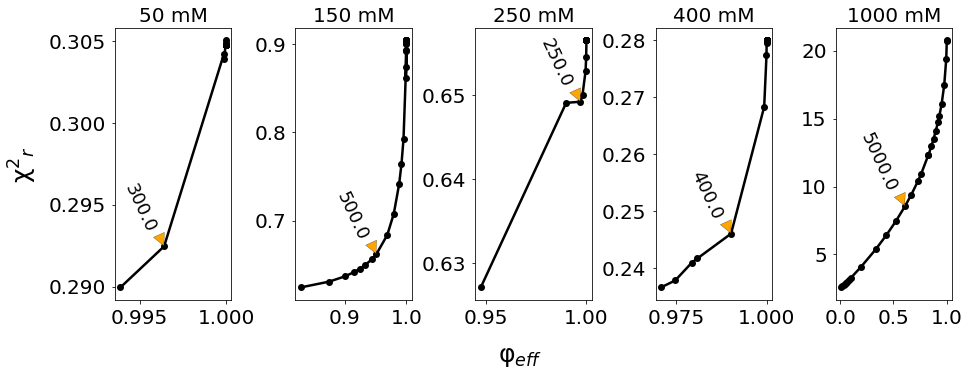

In [5]:
#Plot phi_eff vs chi2

theta = []
Neff = []
Chi2r = []
conclist = [50,150,250,400,1000]
thetalist = [300, 500, 250, 400, 5000]

for conc in conclist:
    directory = '../%smM/stage/' % str(conc)
    theta.append(np.genfromtxt(directory + 'BME_0.dat', skip_header=1, usecols=(0), unpack=True))
    Neff.append(np.genfromtxt(directory + 'BME_0.dat', skip_header=1, usecols=(1), unpack=True))  
    Chi2r.append(np.genfromtxt(directory + 'BME_0.dat', skip_header=1, usecols=(3), unpack=True))

fig, ax = plt.subplots(figsize=(15,5), ncols=5, sharex='col')

for i in range(len(conclist)):
    ax[i].plot(Neff[i], Chi2r[i], 'o-', color='black', linewidth=2.5, markersize=7)
    #ax[i].set_xticks(np.arange(0, 1.1, step=0.5))
    #ax[i].set_yticks(np.arange(0, 10.1, step=2))
    #ax[i].set_xlim(left=0.95, right=1)
    #ax[i].set_ylim(top=12, bottom=0)
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].set_title(str(conclist[i]) + ' mM', fontsize=20)
    for x, y, z in zip(Neff[i], Chi2r[i], theta[i]):
        if z == thetalist[i]:
            ax[i].annotate('{}'.format(z), xy=(x,y), xytext=(-5, 15), ha='right', textcoords='offset points', fontsize=18, rotation=-65, arrowprops=dict(facecolor='orange', shrink=0.05),)

ax[4].set_xticks(np.arange(0, 1.1, step=0.5)) 
plt.subplots_adjust(wspace = 0.55)
    
fig.text(0.5, 0, 'φ$_{eff}$', ha='center', va='top', fontsize=25)
fig.text(0.04, 0.5, 'χ$^{2}$$_{r}$', ha='center', va='center', fontsize=25, rotation=90)

fig.savefig("../figures/phieff_Chi2r_theta.pdf", bbox_inches='tight', pad_inches=1)


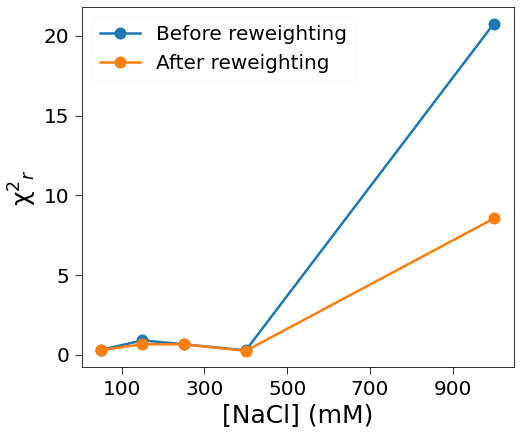

In [6]:
Chi2r_beforerew = []

chi2_before = []
chi2_after = []
for i in range(len(conclist)):
    directory = '../%smM/stage/' % str(conclist[i])
    Chi2r_beforerew.append(np.genfromtxt(directory + 'BME_0.dat', skip_header=1, usecols=(2), unpack=True))
    for x, y, z in zip(Chi2r_beforerew[i], Chi2r[i], theta[i]):
        if z == thetalist[i]:
            chi2_before.append(x)
            chi2_after.append(y)

fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(conclist, chi2_before, 'o-', linewidth=2.5, markersize=12, label='Before reweighting')
plt.plot(conclist, chi2_after, 'o-', linewidth=2.5, markersize=12, label='After reweighting')

plt.legend(fontsize=20)

#plt.ylim(2.8, 3.3)
#plt.xlim(40, 510)

plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('χ$^{2}$$_{r}$', fontsize=25)

plt.xticks(np.arange(100, 1001, step=200),fontsize=20)
plt.yticks(fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig("../figures/chi2_vs_NaCl_beforeafterrew.pdf", bbox_inches='tight', pad_inches=1)

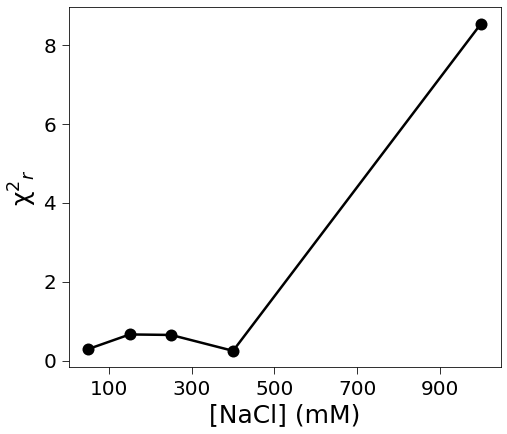

In [8]:
fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(conclist, chi2_after, 'o-', linewidth=2.5, markersize=12, color='black')

#plt.ylim(2.8, 3.3)
#plt.xlim(40, 510)

plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('χ$^{2}$$_{r}$', fontsize=25)

plt.xticks(np.arange(100, 1001, step=200),fontsize=20)
plt.yticks(fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig("../figures/chi2_vs_NaCl.pdf", bbox_inches='tight', pad_inches=1)

# Rg

19001
19001
19001
19001
19001


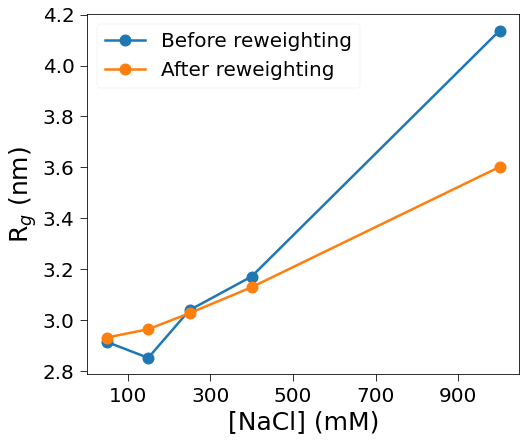

In [32]:
#Load notag Rgs from file
NaCl = [50,150,250,400,1000]
Rg = []
Rg_avg = []
Rg_avg_rew = []

#Calculate Rg average from .xvg files and append to Rg_avg
for i in range(len(NaCl)):
    Rg.append(np.genfromtxt('Rg_gyrate_' + str(NaCl[i]) + 'mM.xvg',skip_header=27,skip_footer=0,usecols=[1],unpack=True))
    Rg_avg.append(np.average(Rg[i]))
    
    print(len(Rg[i]))
    
    weights = np.genfromtxt('weights_%smM.dat' % str(NaCl[i]), usecols=[1])
    Rg_avg_rew.append(np.average(Rg[i], weights=weights))
    
#Plot Rg averages
fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(NaCl, Rg_avg, 'o-', linewidth=2.5, markersize=12, label='Before reweighting')
plt.plot(NaCl, Rg_avg_rew, 'o-', linewidth=2.5, markersize=12, label='After reweighting')

plt.legend(fontsize=20)

#plt.ylim(2.8, 3.3)
#plt.xlim(40, 510)


plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('R$_g$ (nm)', fontsize=25)

plt.xticks(np.arange(100, 1001, step=200),fontsize=20)
plt.yticks(np.arange(2.8, 4.2, step=0.2),fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig("../figures/Rgcoords_vs_NaCl_beforeafter_rew.pdf", bbox_inches='tight', pad_inches=1)

In [33]:
output='Rgcoords_vs_NaCl.dat'
with open(output, 'w') as f:
    f.write('#NaCl \tRg_coords_beforerew \tRg_coords_afterrew \n')
    for i in range(len(NaCl)):
        f.write('%i \t%f \t%f \n' % (NaCl[i], Rg_avg[i], Rg_avg_rew[i])) 

# Average SAXS profiles

In [35]:
#Get SAXS data and calculate average SAXS
conclist = [50,150,250,400,1000]

first_frame = 1000
last_frame = 20000
#theta = 100

for j in range(len(conclist)):
    output = "Ifit_average_%imM.dat" % conclist[j]
    experimentalfile = "../%imM/stage/exp_data_0.dat" % conclist[j]

    nr_of_frames = last_frame-first_frame+1


    #Make arrays of I with 0 for every q, to add to later
    Ifit_sum = []
    Ifit_weighted_avg = []
    q =  np.genfromtxt('../%imM/stage/w_AA_frame%ichain_0.fit' % (conclist[j], first_frame),skip_header=6,skip_footer=0,usecols=[0],unpack=True)
    Ifit_sum = [0]*len(q)
    Ifit_weightedavg = [0]*len(q)

    #load weights
    weights = np.genfromtxt('weights_%imM.dat' % conclist[j],skip_header=0,skip_footer=0,usecols=[1],unpack=True)
    #uniformly average I over all files and weighted average I over all files
    for i in range(first_frame,last_frame+1):
        q,Iexp,dI,Ifit =  np.genfromtxt('../%imM/stage/w_AA_frame%ichain_0.fit' % (conclist[j],i),skip_header=6,skip_footer=0,usecols=[0,1,2,3],unpack=True)
        Ifit_sum += Ifit
        Ifit_weightedavg += Ifit*weights[i-first_frame]
    Ifit_avg = Ifit_sum/nr_of_frames

    err = np.genfromtxt(experimentalfile,skip_header=1,skip_footer=0,usecols=[2],unpack=True)
    
    #Calculate residuals
    residuals_avg = (Iexp-Ifit_avg)/err
    residuals_weightedavg = (Iexp-Ifit_weightedavg)/err

    #Write file with average SAXS and residuals
    with open(output, 'w') as f:
        f.write('#q \t Iexp \t Ifit_avg \t Residuals_avg \t Ifit_weightedavg \t Residuals_weightedavg \n')
        for i in range(len(q)):
            f.write("%e \t%e \t%e \t%e \t%e \t%e \n" % (q[i], Iexp[i], Ifit_avg[i], residuals_avg[i], Ifit_weightedavg[i], residuals_weightedavg[i]))


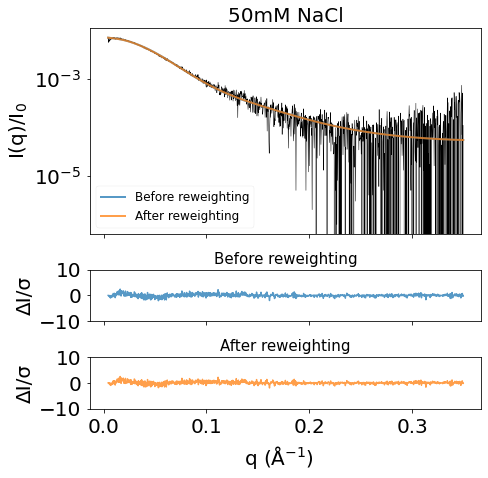

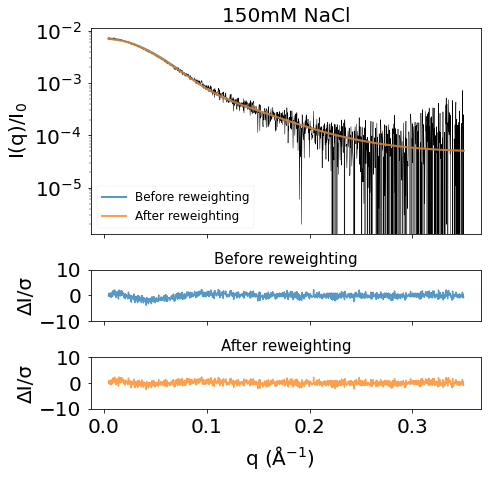

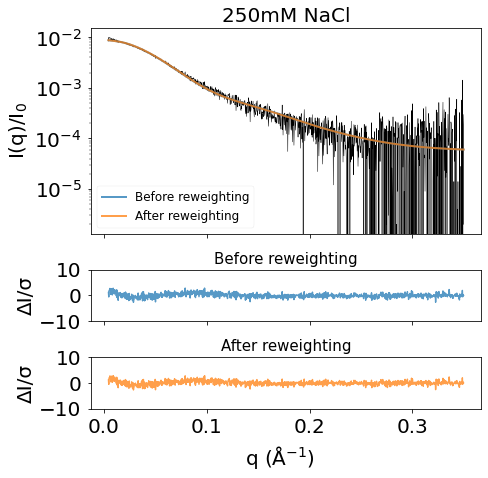

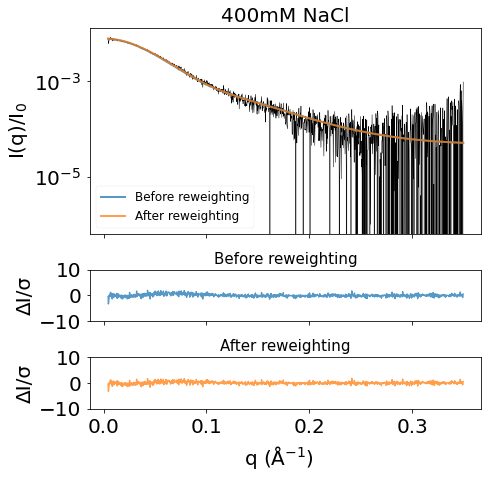

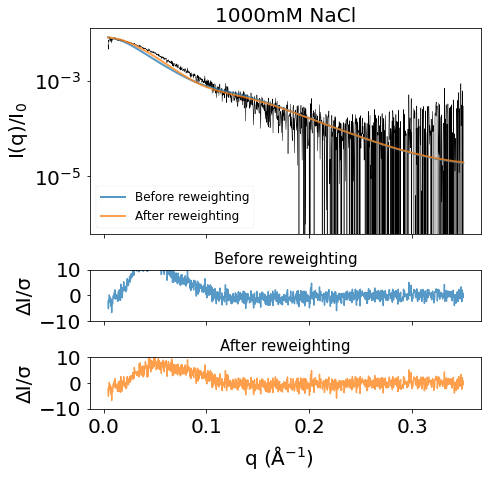

In [36]:
#Plot
DC = plt.rcParams['axes.prop_cycle'].by_key()['color']

conclist = [50,150,250,400,1000]

for i in range(len(conclist)):

    q, Iexp, Ifit_avg, Residuals_avg, Ifit_weightedavg, Residuals_weightedavg = np.genfromtxt('Ifit_average_' + str(conclist[i]) + 'mM.dat', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True)

    fig, ax = plt.subplots(figsize = (7,7), nrows=3, sharex='col', sharey='row', gridspec_kw={'height_ratios': [4, 1, 1]})

    ax[0].plot(q, Iexp, color='black', linewidth=0.5)
    ax[0].plot(q, Ifit_avg, linewidth=2, label="Before reweighting", alpha=0.75)
    ax[0].plot(q, Ifit_weightedavg, linewidth=2, label="After reweighting", alpha=0.75)
    ax[0].semilogy()
    ax[0].set_ylabel('I(q)/I$_{0}$', fontsize=20)
    #ax[0].set_xlim(left=0, right=0.3)
    ax[0].legend(fontsize=12, loc='lower left')
    ax[0].set_title(str(conclist[i]) + 'mM NaCl', fontsize=20)

    for j in range(len(ax)):
        ax[j].tick_params(axis='both', which='major', labelsize=20)

    ax[1].plot(q, Residuals_avg, color= DC[0], alpha=0.75)
    ax[1].set_title('Before reweighting', fontsize=15)
    ax[1].set_ylabel('ΔI/σ', fontsize=20)
    ax[1].set_ylim(bottom=-10, top=10)

    ax[2].plot(q, Residuals_weightedavg, color= DC[1], alpha=0.75)
    ax[2].set_title('After reweighting', fontsize=15)
    ax[2].set_ylabel('ΔI/σ', fontsize=20)
    ax[2].set_ylim(bottom=-10, top=10)

    fig.text(0.5, 0.055, 'q (Å$^{-1}$)', ha='center', va='top', fontsize=20)

    plt.subplots_adjust(hspace = 0.35)
    
    fig.savefig("../figures/Ifit_beforeafter_rew_%imM.pdf" % conclist[i], bbox_inches='tight', pad_inches=1)
    


# Analysis of contacts

## LCD-RRMs contacts (RRMs residues)

RKLFIGGLSFETTDESLRSHFEQWGTLTDCVVMRDPNTKRSRGFGFVTYATVEEVDAAMNARPHKVDGRVVEPKRAVSREDSQRPGAHLTVKKIFVGGIKEDTEEHHLRDYFEQYGKIEVIEIMTDRGSGKKRGFAFVTFDDHDSVDKIVIQKYHTVNGHNCEVRKALSKQ
[4, 7, 6]
[18, 13, 11]
[4, 6, 6]
[7, 9, 10]
[12, 11, 8]
[6, 2, 3]


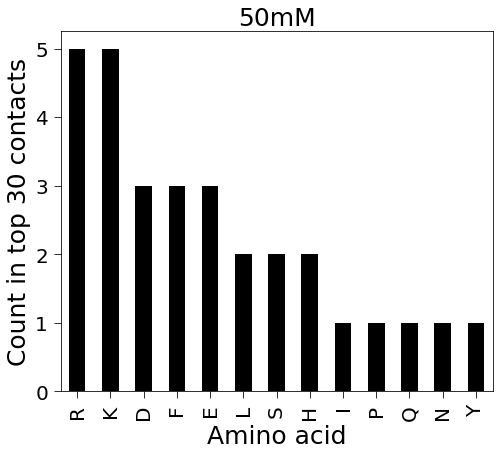

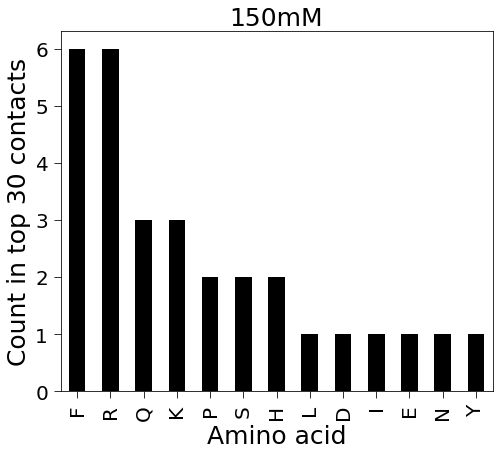

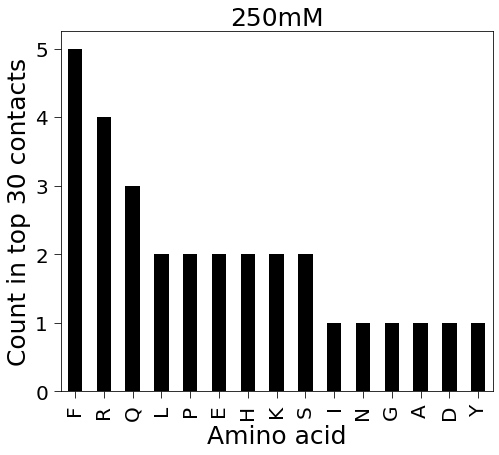

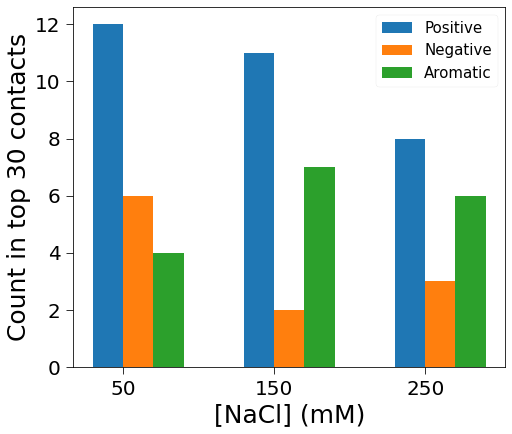

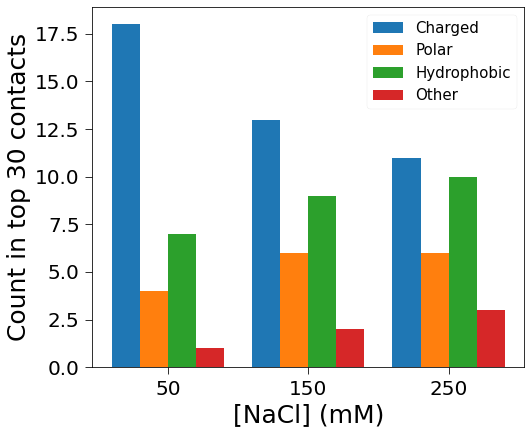

In [2]:
NaCl = [50,150,250]
first_res = 133
last_res = 303

#We are looking at the top x contacts - how many do you want to include?
number_of_contacts=30

#Find top contacts and find aa type and resinum
aa = str(np.genfromtxt('hnrnpa1_FLdH_HisSUMO.seq', dtype=str))
aa = aa[first_res-1:last_res]
print(aa)

top_aa_types_NaCl = []
for i in range(len(NaCl)):
    resinum, contacts_rew = np.genfromtxt('LCD_resicontacts_RRMs_%imM_group.dat' % NaCl[i], usecols=(0,2), skip_header=1, unpack=True)
    top_contacts = np.sort(contacts_rew)[-number_of_contacts:]
    
    assert len(contacts_rew) == len(aa)
    
    top_aa_types = []
    for contact in top_contacts:
        contact_index = np.where(contacts_rew == contact)
        contact_index = int(contact_index[0])
        contact_aa = aa[contact_index]
        contact_resnum = resinum[contact_index]
        top_aa_types.append(contact_aa)
        
    top_aa_types_NaCl.append(np.sort(top_aa_types))    

#Count different types of amino acids in top contacts for each NaCl concentration

aromatics_count = [0]*len(NaCl) 
aromatics = ['F', 'Y', 'W']

charged_count = [0]*len(NaCl) 
charged = ['R', 'H', 'K', 'D', 'E']

polar_count = [0]*len(NaCl) 
polar = ['S', 'T', 'N', 'Q']

hydrophobic_count = [0]*len(NaCl) 
hydrophobic = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W']

positive_count = [0]*len(NaCl) 
positive = ['R', 'H', 'K']

negative_count = [0]*len(NaCl) 
negative = ['D', 'E']

other_count = [0]*len(NaCl)
other = ['C', 'G', 'P']

for i in range(len(NaCl)):
    for aa in top_aa_types_NaCl[i]:
        if aa in aromatics:
            aromatics_count[i] += 1
        if aa in charged:
            charged_count[i] += 1
        if aa in polar:
            polar_count[i] += 1
        if aa in hydrophobic:
            hydrophobic_count[i] += 1
        if aa in positive:
            positive_count[i] += 1
        if aa in negative:
            negative_count[i] += 1
        if aa in other:
            other_count[i] += 1
    assert(charged_count[i] + polar_count[i] + hydrophobic_count[i] + other_count[i] == number_of_contacts)

print(aromatics_count)
print(charged_count)
print(polar_count)
print(hydrophobic_count)
print(positive_count)
print(negative_count)

#Plot amino acid count in top contacts for each NaCl concentration
for i in range(len(NaCl)):
    fig= plt.figure(figsize=(6,5))
    axes= fig.add_axes([1,1,1,1])
    
    pd.Series(top_aa_types_NaCl[i]).value_counts().plot(kind='bar', color='black')

    plt.tick_params(colors='black', direction='out', length=7)
    plt.title('%imM' % NaCl[i], fontsize=25)
    plt.xlabel('Amino acid', fontsize=25)
    plt.ylabel('Count in top %i contacts' % number_of_contacts, fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20) 
    
    fig.savefig("../figures/LCD_RRMs_AAcountRRMs_top30contacts_%imM.pdf" % NaCl[i], bbox_inches='tight', pad_inches=1)


fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

width=20
r1 = [100, 200, 300]
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

width=20
plt.bar(r1, positive_count, width=width, label='Positive', align='edge')
plt.bar(r2, negative_count, width=width, label='Negative', align='edge', tick_label=['50','150','250'])
plt.bar(r3, aromatics_count, width=width, label='Aromatic', align='edge')


plt.legend(fontsize=15)
plt.tick_params(colors='black', direction='out', length=7)
plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('Count in top %i contacts' % number_of_contacts, fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

fig.savefig("../figures/LCD_RRMs_positivenegativearomaticcountRRMs_top30contacts.pdf", bbox_inches='tight', pad_inches=1)


width=20
r1 = [100, 200, 300]
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.bar(r1, charged_count, width=width, label='Charged', align='edge')
plt.bar(r2, polar_count, width=width, label='Polar', align='edge')
plt.bar(r3, hydrophobic_count, width=width, label='Hydrophobic', align='edge', tick_label=['50','150','250'])
plt.bar(r4, other_count, width=width, label='Other', align='edge')

plt.legend(fontsize=15)
plt.tick_params(colors='black', direction='out', length=7)
plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('Count in top %i contacts' % number_of_contacts, fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

fig.savefig("../figures/LCD_RRMs_AAcategoryRRMs_top30contacts.pdf", bbox_inches='tight', pad_inches=1)


## LCD-RRMs contacts (LCD residues)

GRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGNYNNQSSNFGPMKGGNFGGRSSGPYGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF
[13, 13, 14]
[8, 9, 7]
[6, 5, 6]
[14, 14, 14]
[8, 7, 5]
[0, 2, 2]


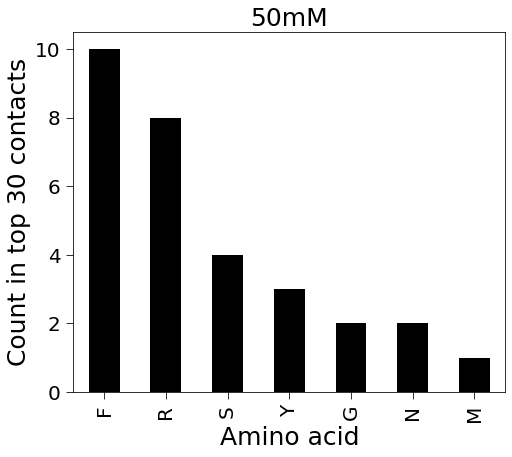

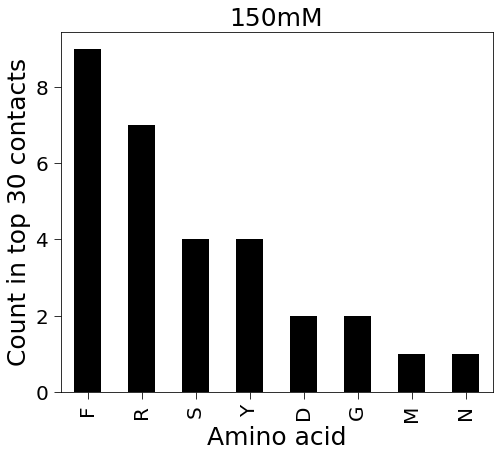

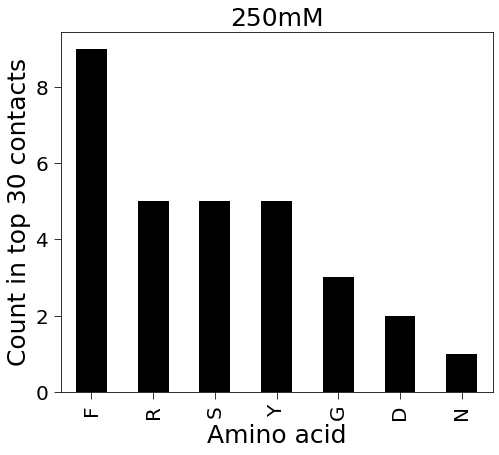

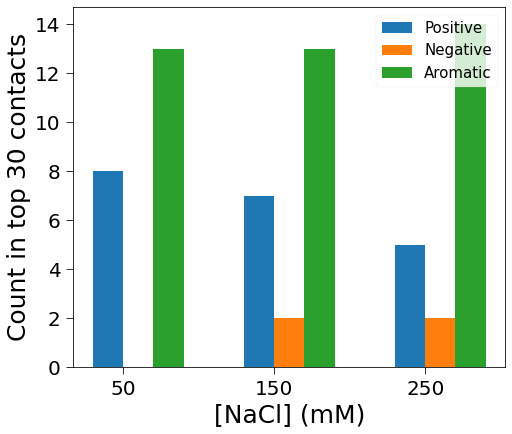

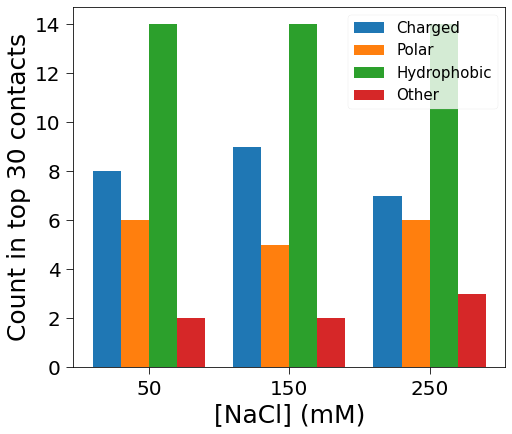

In [3]:
NaCl = [50,150,250]
first_res = 314
last_res = 433

#We are looking at the top x contacts - how many do you want to include?
number_of_contacts=30

#Find top contacts and find aa type and resinum
aa = str(np.genfromtxt('hnrnpa1_FLdH_HisSUMO.seq', dtype=str))
aa = aa[first_res-1:last_res]
print(aa)

top_aa_types_NaCl = []
for i in range(len(NaCl)):
    resinum, contacts_rew = np.genfromtxt('RRMs_resicontacts_LCD_%imM_group.dat' % NaCl[i], usecols=(0,2), skip_header=1, unpack=True)
    top_contacts = np.sort(contacts_rew)[-number_of_contacts:]
    
    assert len(contacts_rew) == len(aa)
    
    top_aa_types = []
    for contact in top_contacts:
        contact_index = np.where(contacts_rew == contact)
        contact_index = int(contact_index[0])
        contact_aa = aa[contact_index]
        contact_resnum = resinum[contact_index]
        top_aa_types.append(contact_aa)
        
    top_aa_types_NaCl.append(np.sort(top_aa_types))    

#Count different types of amino acids in top contacts for each NaCl concentration

aromatics_count = [0]*len(NaCl) 
aromatics = ['F', 'Y', 'W']

charged_count = [0]*len(NaCl) 
charged = ['R', 'H', 'K', 'D', 'E']

polar_count = [0]*len(NaCl) 
polar = ['S', 'T', 'N', 'Q']

hydrophobic_count = [0]*len(NaCl) 
hydrophobic = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W']

positive_count = [0]*len(NaCl) 
positive = ['R', 'H', 'K']

negative_count = [0]*len(NaCl) 
negative = ['D', 'E']

other_count = [0]*len(NaCl)
other = ['C', 'G', 'P']

for i in range(len(NaCl)):
    for aa in top_aa_types_NaCl[i]:
        if aa in aromatics:
            aromatics_count[i] += 1
        if aa in charged:
            charged_count[i] += 1
        if aa in polar:
            polar_count[i] += 1
        if aa in hydrophobic:
            hydrophobic_count[i] += 1
        if aa in positive:
            positive_count[i] += 1
        if aa in negative:
            negative_count[i] += 1
        if aa in other:
            other_count[i] += 1
    assert(charged_count[i] + polar_count[i] + hydrophobic_count[i] + other_count[i] == number_of_contacts)

print(aromatics_count)
print(charged_count)
print(polar_count)
print(hydrophobic_count)
print(positive_count)
print(negative_count)

#Plot amino acid count in top contacts for each NaCl concentration
for i in range(len(NaCl)):
    fig= plt.figure(figsize=(6,5))
    axes= fig.add_axes([1,1,1,1])
    
    pd.Series(top_aa_types_NaCl[i]).value_counts().plot(kind='bar', color='black')

    plt.tick_params(colors='black', direction='out', length=7)
    plt.title('%imM' % NaCl[i], fontsize=25)
    plt.xlabel('Amino acid', fontsize=25)
    plt.ylabel('Count in top %i contacts' % number_of_contacts, fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20) 
    
    fig.savefig("../figures/LCD_RRMs_AAcountLCD_top30contacts_%imM.pdf" % NaCl[i], bbox_inches='tight', pad_inches=1)


fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

width=20
r1 = [100, 200, 300]
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

width=20
plt.bar(r1, positive_count, width=width, label='Positive', align='edge')
plt.bar(r2, negative_count, width=width, label='Negative', align='edge', tick_label=['50','150','250'])
plt.bar(r3, aromatics_count, width=width, label='Aromatic', align='edge')


plt.legend(fontsize=15)
plt.tick_params(colors='black', direction='out', length=7)
plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('Count in top %i contacts' % number_of_contacts, fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

fig.savefig("../figures/LCD_RRMs_positivenegativearomaticcountLCD_top30contacts.pdf", bbox_inches='tight', pad_inches=1)


width=20
r1 = [100, 200, 300]
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.bar(r1, charged_count, width=width, label='Charged', align='edge')
plt.bar(r2, polar_count, width=width, label='Polar', align='edge')
plt.bar(r3, hydrophobic_count, width=width, label='Hydrophobic', align='edge', tick_label=['50','150','250'])
plt.bar(r4, other_count, width=width, label='Other', align='edge')

plt.legend(fontsize=15)
plt.tick_params(colors='black', direction='out', length=7)
plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('Count in top %i contacts' % number_of_contacts, fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

fig.savefig("../figures/LCD_RRMs_AAcategoryLCD_top30contacts.pdf", bbox_inches='tight', pad_inches=1)


# Make attributes file of LCD-RRM contacts (RRM residues) for Chimera

In [15]:
NaCl = [50, 150, 250, 400, 1000]

#Load contacts
resi = []
contacts_rew = []
for i in range(len(NaCl)):
    resi.append(np.genfromtxt('LCD_resicontacts_RRMs_%imM_group.dat' % NaCl[i], usecols=(0), skip_header=1))
    contacts_rew.append(np.genfromtxt('LCD_resicontacts_RRMs_%imM_group.dat' % NaCl[i], usecols=(2), skip_header=1))
    resi[i] = resi[i] - 119
print(resi)

[array([ 14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123.,
       124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134.,
       135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145.,
       146., 147., 148., 149., 150., 151., 152., 153., 154., 155., 156.,
       157., 158., 159., 160., 161., 162., 163., 1

In [20]:
#Write attribute files
for i in range(len(NaCl)):
    output = 'contacts_rew_RRMresis_Chimeraattribute_%imM.txt' % NaCl[i]
    with open(output, 'w') as f:
        f.write('#Contacts to LCD after reweighting\n#hnRNPA1* with %imM NaCl\nattribute: contacts\nmatch mode: 1-to-1\nrecipient: residues\n' % NaCl[i])
        for j in range(len(resi[i])):
            f.write('\t:%i\t%f\n' % (resi[i][j], contacts_rew[i][j]))